<a href="https://colab.research.google.com/github/ldennis1/BSAN6070--CA04/blob/main/CA04_Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Source and Contents

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  #package for endocing
from sklearn.preprocessing import LabelEncoder
  #package for building model 
from sklearn.tree import DecisionTreeClassifier
  #packages for visualization
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
  #packages for model evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
#Read in the data from csv
census = pd.read_csv('/content/census_data.csv')

Data Quality Analysis

In [ ]:
#inside look at our data
census.head()
census.tail()

In [ ]:
#Descriptive Statistics 
census.describe() 

In [ ]:
#Dispay range, column, number of non-null, datatype and memory info
census.info()

Data Cleaning for Optimal Use

**Step 1**: Our variables are currently type=object, so we must make them type=category in order to encode them in the next step 

In [6]:
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    census[column] = census[column].astype('category')

**Step 2**: Check that column types converted correctly 

In [ ]:
census.info()
#we will remove flag and y columns when we split our data

**Step 3**: Use encoding to change values to an integer 

In [ ]:
# Import label encoder - see initial import packages cell
# label_encoder object knows how to understand word labels. 
 
census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform) 
#check that the output is as expected
census.head()

Split data into test and train datasets based on flag column

In [9]:
#create train dataframe 
train = census.loc[census.flag == 'train']
#create test dataframe 
test = census.loc[census.flag == 'test']

In [ ]:
#look into the train datframe 
train.head()
train.tail()

In [ ]:
#look into the test datframe 
test.head()
test.tail()

In [ ]:
#the flag column is no longer needed, so we can drop said column
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

In [ ]:
#verify column was dropped
train.head()
test.head()

Create our test and train variables 

In [14]:
#these train variables will be used to "train" our model 
y_train = train['y'] #y_train is our dependent variable, or what we are trying to predict 
x_train = train.drop('y', axis=1) #x_train includes all of our independent variables

In [15]:
#These test variables will be used to "test" our model. These variables will not be used 
#to train the model, but will be used to predict and to test the accuracy of our model 
y_test = test['y'] #y_test has the category labels of our test data 
x_test = test.drop('y', axis=1) #x_test includes the rest of our independent variable values and will be used to predict/test accuracy of model 

# 2. Finding Optimal Value of a key Hyper-Parameter

In [ ]:
#how to find the optimal value of max depth 
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options: 
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

# 3. Building a Random Forest Model

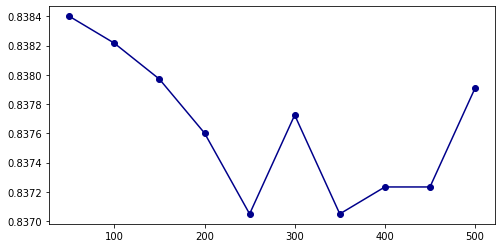

In [22]:
from sklearn.ensemble import RandomForestClassifier
#how to find the optimal number of estimators  
n_est_results = []
optimal_n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in optimal_n_estimators:
  rand_forest = RandomForestClassifier(n_estimators=trees, random_state=101)
  rand_forest.fit(x_train, y_train)
  y_pred = rand_forest.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  n_est_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(n_est_results, optimal_n_estimators).plot(color='darkblue', marker='o')

# 4. Building AdaBoost, Gradient Boost and XGB Models

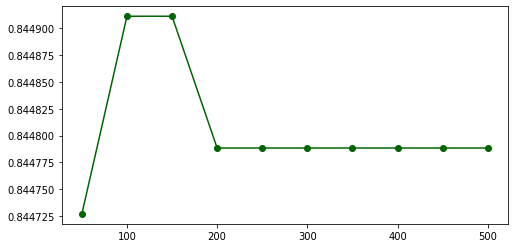

In [26]:
from sklearn.ensemble import AdaBoostClassifier
#how to find the optimal number of estimators  
ada_class_results = []
ada_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  ada_class = AdaBoostClassifier(n_estimators=trees, random_state=101)
  ada_class.fit(x_train, y_train)
  y_pred = ada_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  ada_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(ada_class_results, ada_estimators).plot(color='darkgreen', marker='o')

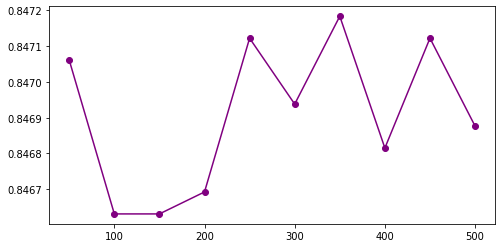

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
#how to find the optimal number of estimators  
gb_class_results = []
gb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  gb_class = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  gb_class.fit(x_train, y_train)
  y_pred = gb_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  gb_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(gb_class_results, gb_estimators).plot(color='purple', marker='o')

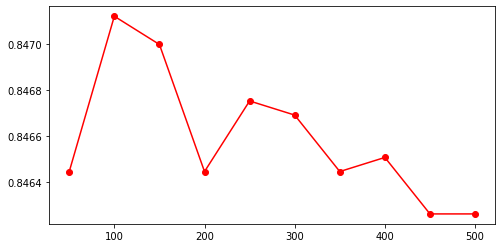

In [30]:
from xgboost import XGBClassifier
#how to find the optimal number of estimators  
xgb_class_results = []
xgb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in xgb_estimators:
  xgb_class = XGBClassifier(n_estimators=trees, random_state=101)
  xgb_class.fit(x_train, y_train)
  y_pred = xgb_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  xgb_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(xgb_class_results, xgb_estimators).plot(color='red', marker='o')

# 5. Performance Evaluation Comparisons

In [39]:
results = []
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier]

common_params = {'n_estimators':100,'random_state':101}

for option in classifiers:

  model = option(**common_params)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  AUC = roc_auc_score(y_test,y_pred)

  results.append([accuracy, AUC])

comparison = pd.DataFrame(results).transpose()
comparison.columns = ['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
comparison.index = ['Accuracy','AUC']
display(comparison)
display(common_params)

,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785


{'n_estimators': 100, 'random_state': 101}